# p-p chain vs. CNO

In [1]:
import pynucastro as pyna

In [2]:
rl = pyna.ReacLibLibrary()

## Simple p-p chain

In [3]:
pp_rates = ["p(p,)d",
            "d(p,g)he3",
            "he3(he3,pp)he4"]

In [4]:
rates = rl.get_rate_by_name(pp_rates)

In [11]:
rc = pyna.RateCollection(rates=rates)

In [15]:
print(rc)

p + p ⟶ H2 + e⁺ + 𝜈
p + p + e⁻ ⟶ H2 + 𝜈
H2 + p ⟶ He3 + 𝛾
He3 + He3 ⟶ p + p + He4



In [7]:
T = 1.5e7
rho = 150
comp = pyna.Composition(rc.unique_nuclei)
comp.set_solar_like()

In [17]:
rc.evaluate_rates(rho, T, comp)

{p + p ⟶ H2 + e⁺ + 𝜈: 2.978374743269654e-18,
 p + p + e⁻ ⟶ H2 + 𝜈: 1.35777847676911e-20,
 H2 + p ⟶ He3 + 𝛾: 0.0058745332906518935,
 He3 + He3 ⟶ p + p + He4: 1.8492945585807887e-13}

We see from this that the first reaction, p + p, is the slowest.

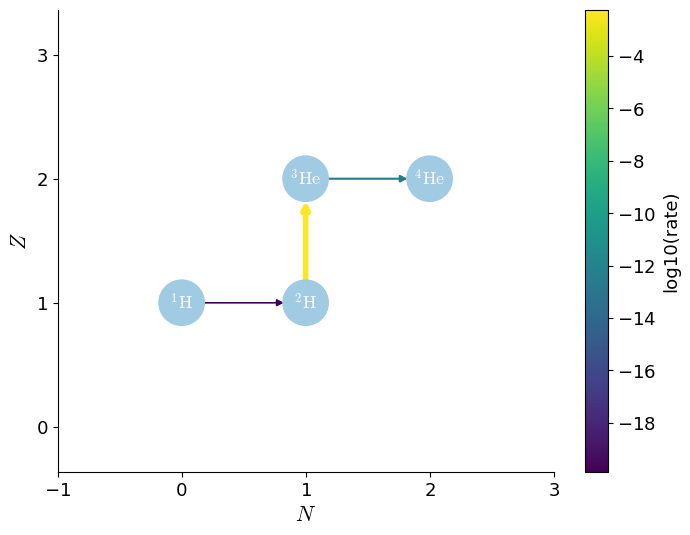

In [14]:
fig = rc.plot(rho=rho, T=T, comp=comp, hide_xp=True, always_show_alpha=True)

We can therefore approximate the p-p chain based on the slowest rate.

In [22]:
r_pp = rc.get_rate_by_name("p(p,)d")[0]

In [25]:
r_pp.get_rate_exponent(1.5e7)

3.9735120950414538

## CNO

In [39]:
cno_rates = ["c12(p,g)n13",
             "c13(p,g)n14",
             "n13(,)c13",
             "n14(p,g)o15",
             "n15(p,a)c12",
             "o15(,)n15"]

In [40]:
rates = rl.get_rate_by_name(cno_rates)

In [46]:
rc_cno = pyna.RateCollection(rates=rates)

In [50]:
comp = pyna.Composition(rc_cno.unique_nuclei)
comp.set_solar_like()

In [51]:
rc_cno

C12 + p ⟶ N13 + 𝛾
C13 + p ⟶ N14 + 𝛾
N13 ⟶ C13 + e⁺ + 𝜈
N14 + p ⟶ O15 + 𝛾
N15 + p ⟶ He4 + C12
O15 ⟶ N15 + e⁺ + 𝜈

In [52]:
rc_cno.evaluate_rates(rho, T, comp)

{C12 + p ⟶ N13 + 𝛾: 1.0467759242295147e-17,
 C13 + p ⟶ N14 + 𝛾: 3.176211597339997e-17,
 N13 ⟶ C13 + e⁺ + 𝜈: 2.9720852738029567e-07,
 N14 + p ⟶ O15 + 𝛾: 1.7295781984662848e-20,
 N15 + p ⟶ He4 + C12: 6.954822248932605e-16,
 O15 ⟶ N15 + e⁺ + 𝜈: 1.2625681768893483e-06}

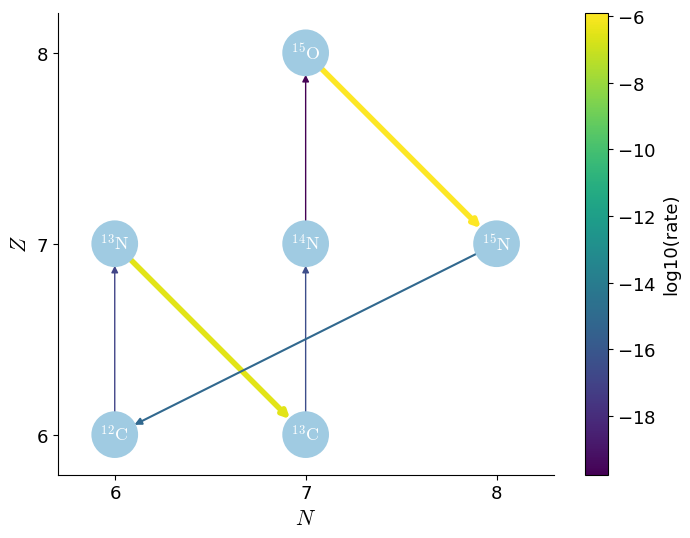

In [55]:
fig = rc_cno.plot(rho=rho, T=T, comp=comp)

Now we see that the N14(p,g)O15 rate is the slowest.

In [62]:
r_cno = rc_cno.get_rate_by_name("n14(p,g)o15")

In [63]:
r_cno.get_rate_exponent(T)

19.850262996669482

Notice that we are now a much steeper function of temperature.  This suggests that if the temperature were a little higher, then CNO would go faster then p-p

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
Ts = np.logspace(6.8, 8, 50)

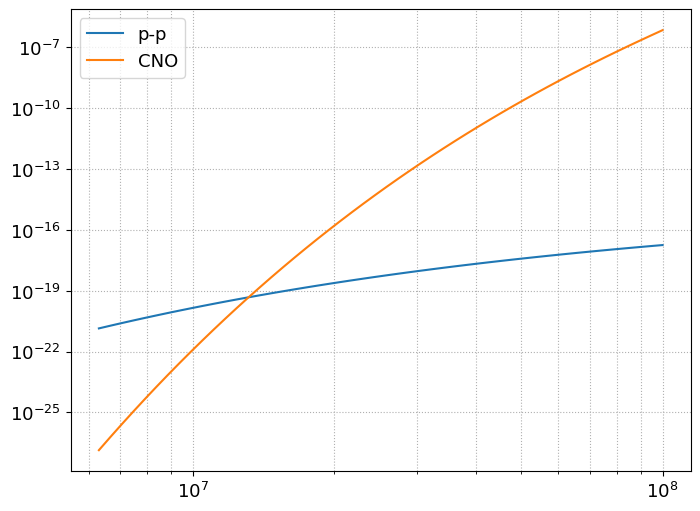

In [77]:
fig, ax = plt.subplots()

ax.plot(Ts, [r_pp.eval(q) for q in Ts], label="p-p")
ax.plot(Ts, [r_cno.eval(q) for q in Ts], label="CNO")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(linestyle=":", which="both")
ax.legend()